# Preparazione per esame orale
## Domanda 1: sistemi lineari
Dato un problema test di dimensioni variabili $Ax = b$ la cui soluzione esatta è il vettore $\tilde{x} = (1, . . . , 1)^T$ e $b$ è il termine noto, ottenuto come $A\tilde{x}$, calcolare:
+ il numero di condizionamento della matrice A
+ la soluzione $x$ del sistema lineare $Ax = b$ mediante la fattorizzazione LU con pivoting.

Considerare come matrice A la matrice quadrata, di numeri casuali generati mediante la funzione `randn` di Numpy, con $n$ variabile tra 10 e 1000.

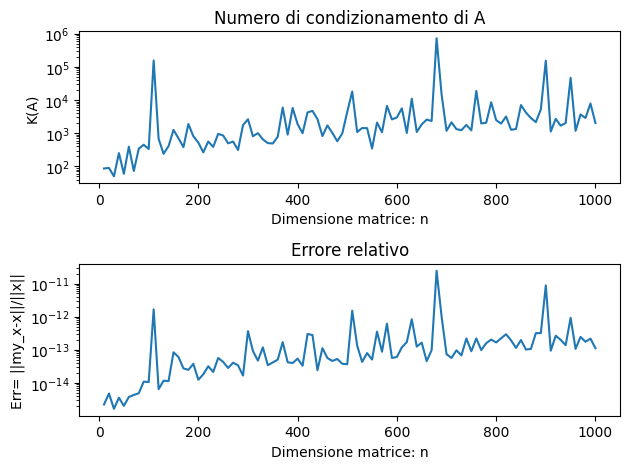

In [167]:
import numpy as np
import scipy
from scipy.linalg import lu_factor as LUdec 
import matplotlib.pyplot as plt

k_a = np.zeros((100,1))
norm = np.zeros((100,1))
for n in range(10, 1001, 10):
    A = np.random.randn(n, n)
    xtilde = np.ones((n,1))
    b = np.matmul(A, xtilde)
    k_a[n//10-1] = np.linalg.cond(A)
    
    lu, piv = LUdec(A)
    my_x = scipy.linalg.lu_solve((lu,piv), b)
    norm[n//10-1] = np.linalg.norm(my_x - xtilde, "fro") / np.linalg.norm(xtilde, "fro")

x_plot = np.arange(10, 1001, 10)
fig, axs = plt.subplots(2)
axs[0].plot(x_plot, k_a)
axs[0].set_yscale("log")
axs[0].set_title("Numero di condizionamento di A")
axs[0].set_xlabel("Dimensione matrice: n")
axs[0].set_ylabel("K(A)")
axs[1].plot(x_plot, norm)
axs[1].set_yscale("log")
axs[1].set_title("Errore relativo")
axs[1].set_xlabel("Dimensione matrice: n")
axs[1].set_ylabel("Err= ||my_x-x||/||x||")
plt.tight_layout()
plt.show()

## Domanda 2: sistemi lineari
Dato un problema test di dimensioni variabili $Ax = b$ la cui soluzione esatta è il vettore $\tilde{x} = (1, . . . , 1)^T$ e $b$ è il termine noto, ottenuto come $A\tilde{x}$, calcolare:
+ il numero di condizionamento della matrice A
+ la soluzione $x$ del sistema lineare $Ax = b$ mediante la fattorizzazione di Cholesky.

Considerare come matrice A la matrice tridiagonale simmetrica definita positiva, avente sulla diagonale principale elementi uguali a 9 ed elementi nella sopra e sottodiagonale uguali a -4, con $n$ variabile.

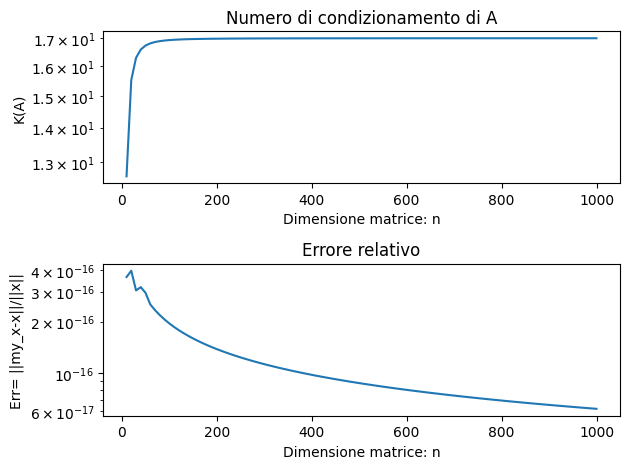

In [168]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

k_a = np.zeros((100,1))
norm = np.zeros((100,1))
for n in range(10, 1001, 10):
    A = np.eye(n)*9 - np.eye(n, k=1)*4 - np.eye(n, k=-1)*4
    xtilde = np.ones((n,1))
    b = np.matmul(A, xtilde)
    k_a[n//10-1] = np.linalg.cond(A)
    L = scipy.linalg.cholesky(A, lower=True)
    y = scipy.linalg.solve_triangular(L, b, lower=True, unit_diagonal=False)
    my_x = scipy.linalg.solve_triangular(np.transpose(L), y, lower=False)
    norm[n//10-1] = np.linalg.norm(my_x - xtilde, "fro") / np.linalg.norm(xtilde, "fro")
    
x_plot = np.arange(10, 1001, 10)
fig, axs = plt.subplots(2)
axs[0].plot(x_plot, k_a)
axs[0].set_yscale("log")
axs[0].set_title("Numero di condizionamento di A")
axs[0].set_xlabel("Dimensione matrice: n")
axs[0].set_ylabel("K(A)")
axs[1].plot(x_plot, norm)
axs[1].set_yscale("log")
axs[1].set_title("Errore relativo")
axs[1].set_xlabel("Dimensione matrice: n")
axs[1].set_ylabel("Err= ||my_x-x||/||x||")
plt.tight_layout()
plt.show()

## Domanda 3: sistemi lineari
Dato un problema test di dimensioni variabili $Ax = b$ la cui soluzione esatta è il vettore $\tilde{x} = (1, . . . , 1)^T$ e $b$ è il termine noto, ottenuto come $A\tilde{x}$, calcolare:
+ il numero di condizionamento della matrice A
+ la soluzione $x$ del sistema lineare $Ax = b$ mediante la fattorizzazione di Cholesky.

Considerare come matrice A la matrice di Hilbert di dimensioni $n$ tra 2 e 15.

Errore: matrice di Hilbert (14) non definita positiva


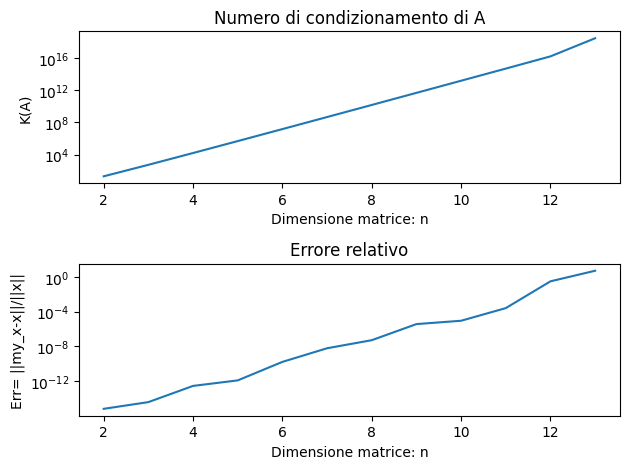

In [169]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

k_a = []
norm = []

for n in range(2,16):
    A = scipy.linalg.hilbert(n)
    x = np.ones((n,1))
    b = np.matmul(A,x)
        
    try:
        L = scipy.linalg.cholesky(A,lower=True)
        y = scipy.linalg.solve_triangular(L, b, lower=True, unit_diagonal=False)
        my_x = scipy.linalg.solve_triangular(np.transpose(L), y, lower=False)
        k_a.append(np.linalg.cond(A))
        norm.append(np.linalg.norm(my_x - x, "fro") / np.linalg.norm(x, "fro"))
        
    except np.linalg.LinAlgError:
        # la matrice di Hilbert è mal condizionata, perciò i calcoli non sono accurati
        print(f"Errore: matrice di Hilbert ({n}) non definita positiva")
        break
  
x_plot = np.arange(2, len(k_a)+2)
fig, axs = plt.subplots(2)
axs[0].plot(x_plot, k_a)
axs[0].set_yscale("log")
axs[0].set_title("Numero di condizionamento di A")
axs[0].set_xlabel("Dimensione matrice: n")
axs[0].set_ylabel("K(A)")
axs[1].plot(x_plot, norm)
axs[1].set_yscale("log")
axs[1].set_title("Errore relativo")
axs[1].set_xlabel("Dimensione matrice: n")
axs[1].set_ylabel("Err= ||my_x-x||/||x||")
plt.tight_layout()
plt.show()

## Domanda 4: Compressione SVD
Discutere la compressione di un’immagine ottenuta approssimandola con diadi calcolate mediante la decomposizione in valori singolari, visualizzando le immagini ottenute al variare del numero $p$ di diadi. Analizzare inoltre i grafici dell’errore relativo e del fattore di compressione $c_p$ al variare di $p$.

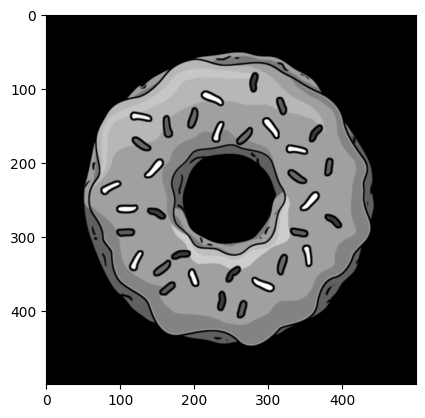

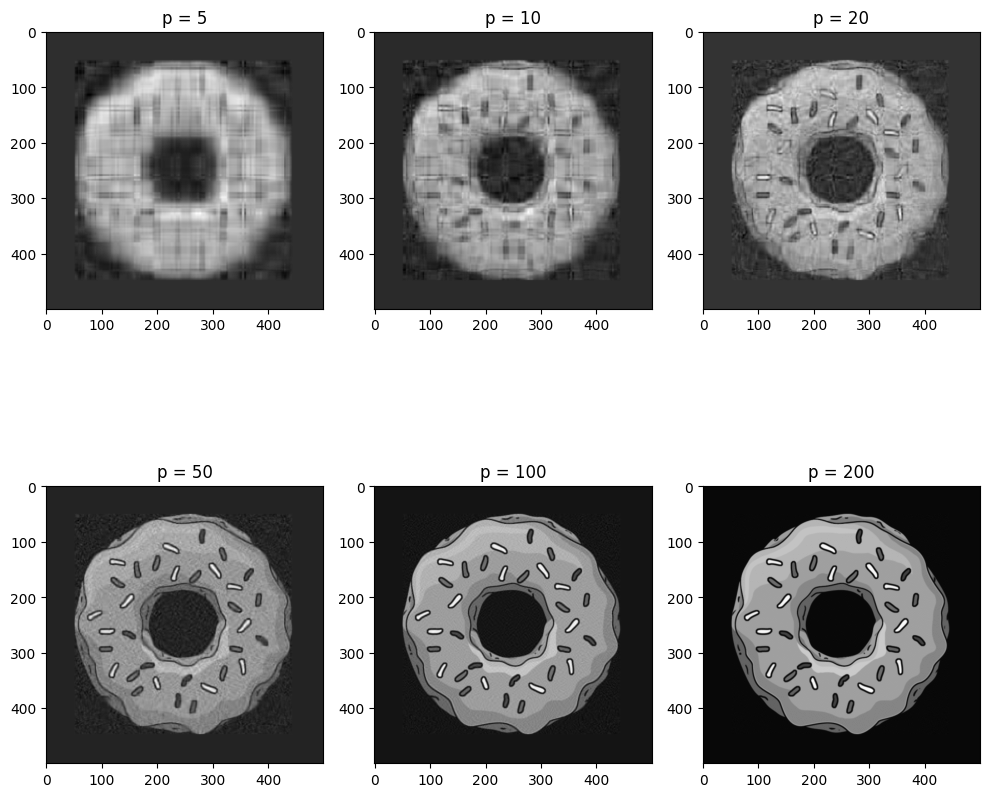

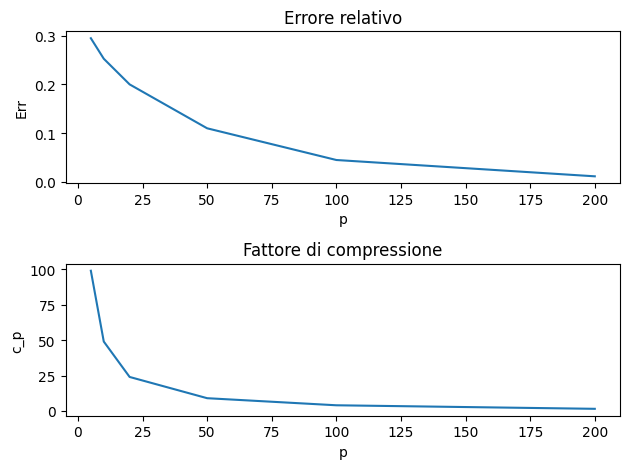

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from skimage.io import imread

A = imread("../assets/donut.png")[..., 2]
plt.imshow(A, cmap="gray")
plt.show()

U, s, Vh = scipy.linalg.svd(A, full_matrices=False)
p = [5, 10, 20, 50, 100, 200]
err = []
c_p = []
plt.figure(figsize=(10, 10))
for p_max in p:
    A_p = np.zeros(A.shape)
    for i in range(p_max):
        ui = U[:, i]
        vi = Vh[i, :]
        A_p += s[i] * np.outer(ui, vi)
    err.append(np.linalg.norm(A - A_p) / np.linalg.norm(A))
    c_p.append((1 / p_max) * min(A.shape[0], A.shape[1]) - 1)
    fig = plt.subplot(2,3,p.index(p_max)+1)
    fig.imshow(A_p, cmap="gray")
    plt.title("p = " + str(p_max))
plt.tight_layout()
plt.show()

plt.subplot(2,1,1)
plt.plot(p, err)
plt.title("Errore relativo")
plt.xlabel("p")
plt.ylabel("Err")
plt.subplot(2,1,2)
plt.plot(p, c_p)
plt.title("Fattore di compressione")
plt.xlabel("p")
plt.ylabel("c_p")
plt.tight_layout()
plt.show()

## Domanda 5 - 6 - 7: approssimazione minimimi quadrati
Discutere l’approssimazione a $m$ dati equispaziati ottenuti campionando la funzione **F** nell'intervallo **I** usando polinomi di grado $n \in \{1, 2, 3, 5, 7\}$.
Si risolva il problema dei minimi quadrati sia mediante le equazioni normali che con SVD, calcolando l’errore di approssimazione in norma 2 per entrambi i metodi. Infine graficare le approssimazioni polinomiali ottenute.

In [171]:
def approx(x,y,title):
    import numpy as np
    import scipy
    from scipy.linalg import lu_factor as LUdec
    import matplotlib.pyplot as plt
    plot = 2
    numbers = [1, 2, 3, 5, 7]
    m = 10
    plt.figure()
    ax = plt.subplot(2,3,1)
    plt.plot(x, y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.grid()
    y = y[np.linspace(0,len(y)-1, m,dtype=int)]
    x = x[np.linspace(0,len(x)-1, m,dtype=int)]
    for n in numbers:
        print("Grado", n)
        A = np.zeros((m, n+1))
        for i in range(n+1):
            A[:, i] = x ** i
        # Equazioni normali
        ATA = np.matmul(A.T, A)
        ATy = np.matmul(A.T, y)
        lu, piv = LUdec(ATA)
        alpha_LU = scipy.linalg.lu_solve((lu,piv), ATy)
        print("LU error: ", scipy.linalg.norm(y - np.matmul(A, alpha_LU)) / scipy.linalg.norm(y))
        # SVD
        U, s, Vh = scipy.linalg.svd(A)
        alpha_svd = np.zeros(n+1)
        for i in range(n+1):
            ui = U[:, i]
            vi = Vh[i, :]
            alpha_svd += (np.matmul(np.transpose(ui),y)) * vi / s[i]
        print("SVD error: ", scipy.linalg.norm(y - np.matmul(A, alpha_svd)) / scipy.linalg.norm(y))
        x_plot = np.linspace(x[0], x[-1], 100)
        A_plot = np.zeros((100, n+1))
        for i in range(n+1):
            A_plot[:, i] = x_plot ** i
        y_interpolation = np.matmul(A_plot, alpha_svd)
        ax = plt.subplot(2, 3, plot)
        plot += 1
        plt.plot(x, y, "o")
        plt.plot(x_plot, y_interpolation, "r")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title("Grado " + str(n))
        plt.grid()
    plt.tight_layout()
    plt.show()

### Domanda 5: approssimazione minimimi quadrati
In relazione alla richiesta sopra, si consideri la funzione $f(x) = exp(x/2)$ nell’intervallo $[−1, 1]$.

Grado 1
LU error:  0.04170008505888761
SVD error:  0.04170008505888758
Grado 2
LU error:  0.003709298191043315
SVD error:  0.0037092981910433168
Grado 3
LU error:  0.0002369457040871065
SVD error:  0.0002369457040871788
Grado 5
LU error:  4.237092067945108e-07
SVD error:  4.237092067659358e-07
Grado 7
LU error:  2.505393586583116e-10
SVD error:  2.5053929399330476e-10


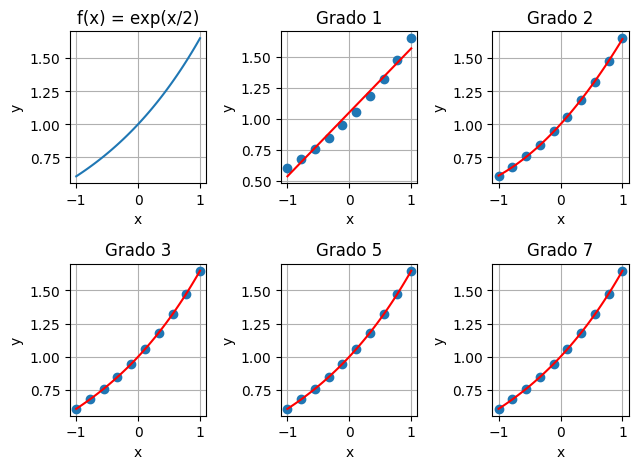

In [172]:
x = np.linspace(-1, 1, 100)
y = np.exp(x/2)
approx(x,y,"f(x) = exp(x/2)")

### Domanda 6: approssimazione minimimi quadrati
In relazione alla richiesta sopra, si consideri la funzione $f(x) = \dfrac{1}{1 + 25\:x^2}$ nell’intervallo $[−1, 1]$.

Grado 1
LU error:  0.7346452695245989
SVD error:  0.734645269524599
Grado 2
LU error:  0.495961701842722
SVD error:  0.495961701842722
Grado 3
LU error:  0.495961701842722
SVD error:  0.495961701842722
Grado 5
LU error:  0.3131628341082106
SVD error:  0.31316283410821066
Grado 7
LU error:  0.167210170150777
SVD error:  0.16721017015077683


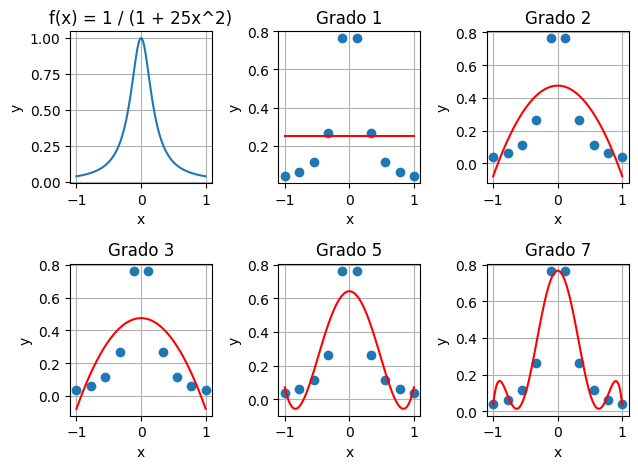

In [173]:
x = np.linspace(-1, 1, 100)
y = 1 / (1 + 25 * x**2)
approx(x,y,"f(x) = 1 / (1 + 25x^2)")

### Domanda 7: approssimazione minimimi quadrati
In relazione alla richiesta sopra, si consideri la funzione $f(x) = \sin{x} + \cos{x}$ nell’intervallo $[0, 2\pi]$.

Grado 1
LU error:  0.8970593024882864
SVD error:  0.8970593024882864
Grado 2
LU error:  0.5677228868492967
SVD error:  0.5677228868492967
Grado 3
LU error:  0.2532259522494117
SVD error:  0.2532259522494113
Grado 5
LU error:  0.020742744067575498
SVD error:  0.02074274406757578
Grado 7
LU error:  0.0005347758937794073
SVD error:  0.000534775893780189


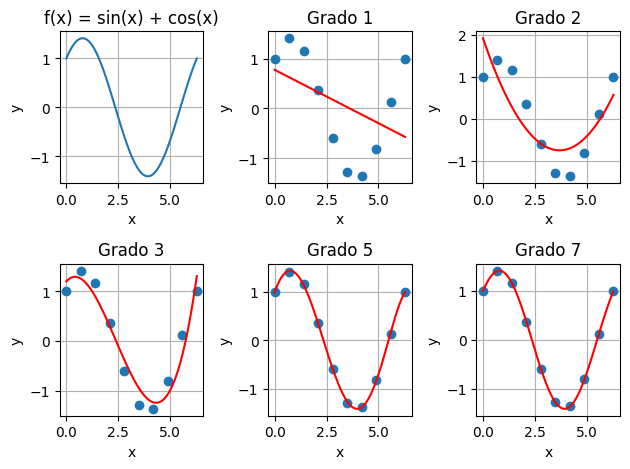

In [174]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.cos(x)
approx(x,y,"f(x) = sin(x) + cos(x)")

## Domanda 8 - 9 - 10: calcolo zero funzione
Discutere i risultati ottenuti per calcolare lo zero della funzione **F(x)** nell’intervallo **I** utilizzando:
+ il metodo di Newton,
+ il metodo delle approssimazioni successive con la funzione **G(x)**

mostrando l’errore commesso al variare delle iterazioni.

In [186]:
def plot_data(f, gs, df, xTrue, interval, title, x0, exercise8=False):
    import numpy as np
    import matplotlib.pyplot as plt
    points_for_plot = ["oy", "og"]
    lines_for_plot = ["-y", "-g"]
    fTrue = f(xTrue)
    print('xTrue = ', xTrue)
    print('fTrue = ', fTrue)
    xplot = np.linspace(interval[0], interval[1])
    fplot = f(xplot)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(xplot,fplot)
    plt.plot(xTrue,fTrue, 'or', label='True', markersize=10)
    tolx= 10**(-10)
    tolf = 10**(-6)
    maxit=100
    sol_g = []
    iter_g = []
    vecErrore_g = []
    x_hist_g = []
    for g in gs:
        sol, iter, vecErrore, x_hist= succ_app(f, g, tolf, tolx, maxit, xTrue, x0)
        print(f'Metodo approssimazioni successive g{gs.index(g)+1}:\n x = {sol}\n iter = {iter}')
        sol_g.append(sol)
        iter_g.append(iter)
        vecErrore_g.append(vecErrore)
        x_hist_g.append(x_hist[:2])
        plt.plot(sol,f(sol), points_for_plot[gs.index(g)], label="g"+str(gs.index(g)+1))
    sol_n, iter_n, vecErrore_n, x_hist_n = newton(f, df, tolf, tolx, maxit, xTrue, x0)
    print(f'Metodo approssimazioni successive Newton:\n x = {sol_n}\n iter = {iter_n}')
    plt.plot(sol_n,f(sol_n), "*b", label='Newton')
    plt.legend()
    plt.title(title)
    plt.grid()
    
    plt.subplot(1,2,2)
    for i in range(len(gs)):
        plt.plot(vecErrore_g[i][:20], lines_for_plot[i], label="g"+str(i+1))
    plt.plot(vecErrore_n, ":b", label="newton")
    labels = ['g'+str(i+1) for i in range(len(gs))]
    labels.append('newton')
    plt.legend(labels)
    plt.xlabel('iter')
    plt.ylabel('errore')
    plt.title('Errore vs Iterazioni')
    plt.grid()
    plt.tight_layout()
    plt.show()
    if exercise8:
        return x_hist_g, x_hist_n[:2]

def succ_app(f, g, tolf, tolx, maxit, xTrue, x0):
    i=0
    vecErrore=np.zeros(maxit+1, dtype=np.float64)
    vecErrore[0] = np.abs(x0-xTrue)
    x_history = []
    x=x0
    while (np.abs(f(x)) > tolf or np.abs(x-x0) > tolx) and i < maxit:
        x0 = x
        x= g(x0)
        x_history.append(x)
        vecErrore[i+1]= np.abs(x-xTrue)
        i=i+1
    return x, i, vecErrore[:i], x_history

def newton(f, df, tolf, tolx, maxit, xTrue, x0):
    g = lambda x: x-(f(x)/df(x))
    x, i, vecErrore, x_history = succ_app(f, g, tolf, tolx, maxit, xTrue, x0)
    return x, i, vecErrore, x_history

### Domanda 8: calcolo zero funzione
In relazione alla richiesta sopra, si consideri la funzione $f(x) = e^x − x^2$ nell’intervallo $[−1, 1]$, con $g_1(x) = x − f(x)e^{x/2}$ e $g_2(x) = x − f(x)e^{−x/2}$ ($x^\ast \approx −0.703467$).
Si mostri inoltre la distanza tra due iterate consecutive.

fTrue =  8.035078391532835e-07
Metodo approssimazioni successive g1:
 x = -0.7034674225096886
 iter = 23
Metodo approssimazioni successive g2:
 x = -0.48775858993453886
 iter = 100
Metodo approssimazioni successive Newton:
 x = -0.7034674224983917
 iter = 6


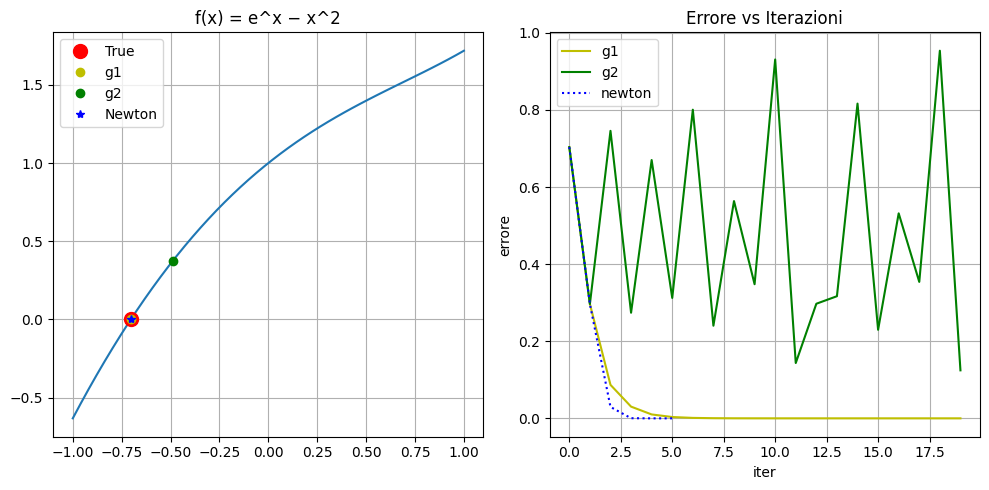

Distanza tra prima e seconda iterazione, valore inziale x = 0.0:
g1: x dopo la 1a iterata = -1.0, x dopo la 2a iterata = -0.6165995004357965, distanza = 0.3834004995642035
g2: x dopo la 1a iterata = -1.0, x dopo la 2a iterata = 0.04219061098749477, distanza = 1.0421906109874948
Newton: x dopo la 1a iterata = -1.0, x dopo la 2a iterata = -0.7330436052454454, distanza = 0.26695639475455457


In [187]:
f = lambda x: np.exp(x) - x**2
g = [lambda x: x - f(x)*np.exp(x/2), lambda x: x - f(x)*np.exp(-x/2)]
df = lambda x: np.exp(x) - 2*x
xTrue = -0.703467
interval = [-1, 1]
title = "f(x) = e^x − x^2"
x_hist_g, x_hist_n = plot_data(f, g, df, xTrue, interval, title, (interval[0] + interval[1]) / 2, True)

print(f"Distanza tra prima e seconda iterazione, valore inziale x = {(interval[0] + interval[1]) / 2}:")
for j in range(len(x_hist_g)):
    print(f"g{j+1}: x dopo la 1a iterata = {x_hist_g[j][0]}, x dopo la 2a iterata = {x_hist_g[j][1]}, distanza = {np.abs(x_hist_g[j][1] - x_hist_g[j][0])}")
print(f"Newton: x dopo la 1a iterata = {x_hist_n[0]}, x dopo la 2a iterata = {x_hist_n[1]}, distanza = {np.abs(x_hist_n[1] - x_hist_n[0])}")

### Domanda 9: calcolo zero funzione
In relazione alla richiesta sopra, si consideri la funzione $f(x) = x^3 + 4x \cos{x} − 2$ nell’intervallo $[0, 2]$, con $g(x) = \dfrac{2−x^3}{4\cos{x}}$ ($x^\ast \approx 0.5369$).

fTrue =  0.00019685736043539848
Metodo approssimazioni successive g1:
 x = 0.5368385515641152
 iter = 10
Metodo approssimazioni successive Newton:
 x = 0.5368385515667755
 iter = 6


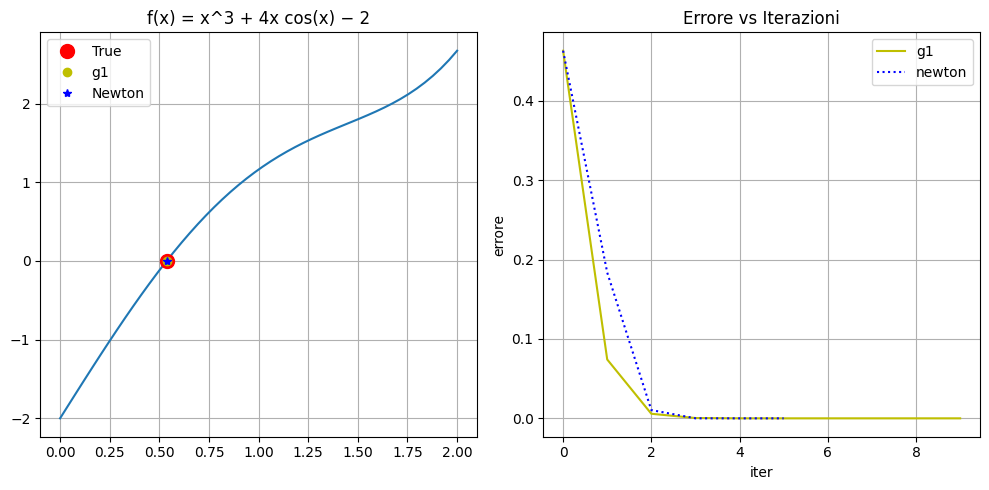

In [188]:
f = lambda x: x**3 + 4*x*np.cos(x) - 2
g = [lambda x: (2-x**3)/(4*np.cos(x))]
df = lambda x: 3*x**2 + 4*np.cos(x) - 4*x*np.sin(x)
xTrue = 0.5369
interval = [0, 2]
title = "f(x) = x^3 + 4x cos(x) − 2"
plot_data(f, g, df, xTrue, interval, title, (interval[0] + interval[1]) / 2)

### Domanda 10: calcolo zero funzione
In relazione alla richiesta sopra, si consideri la funzione $f(x) = x − x^{1/3} − 2$ nell’intervallo $[3, 5]$, con $g(x) = x^{1/3} + 2$ ($x^\ast \approx 3.5213$).

fTrue =  -6.822785407889498e-05
Metodo approssimazioni successive g1:
 x = 3.521379706809784
 iter = 13
Metodo approssimazioni successive Newton:
 x = 3.521379706804568
 iter = 4


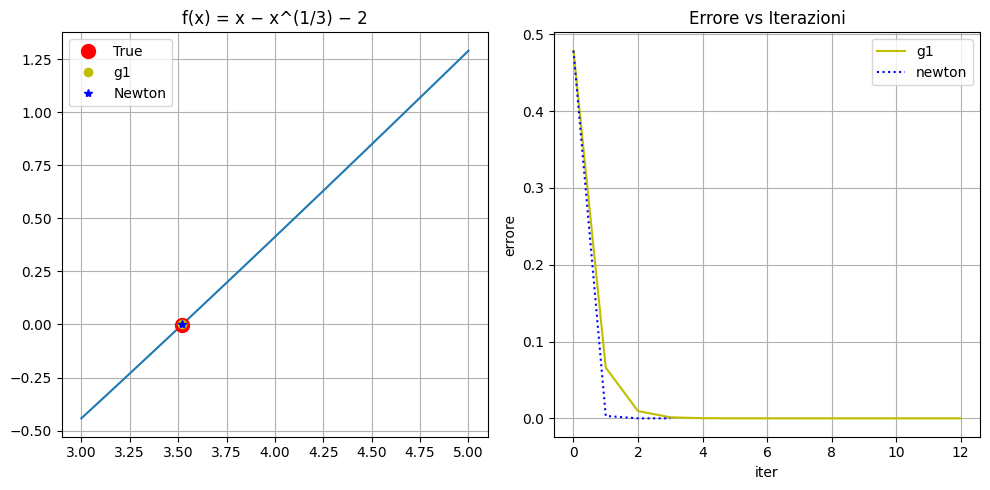

In [189]:
f = lambda x: x - x**(1/3) - 2
g = [lambda x: x**(1/3) + 2]
df = lambda x: 1 - 1/(3*x**(2/3))
xTrue = 3.5213
interval = [3, 5]
title = "f(x) = x − x^(1/3) − 2"
# Con x0 = 0 non converge, scelgo un altro valore
plot_data(f, g, df, xTrue, interval, title, (interval[0]+interval[1])/2)

## Domanda 11 - 12: metodo del gradiente
Discutere la minimizzazione della funzione **F** utilizzando il metodo del gradiente con passo sia fisso che variabile calcolato con algoritmo di backtracking. 
Discutere i grafici dell’errore, del valore della funzione e della norma del gradiente al variare delle iterazioni.

In [1]:
def next_step(x,p): # backtracking procedure for the choice of the steplength
    alpha=1.1
    rho = 0.5
    c1 = 0.25
    j=0
    jmax=10
    while (f(x + alpha * p) > f(x) + c1 * alpha * np.dot(-p, p)) and j<jmax: # grad = -p
        alpha= rho*alpha
        j+=1
    if j>jmax:
        return -1
    else:
        return alpha

def minimize(f,grad_f,x0,step,maxit,tol,xTrue,fixed=True): # funzione che implementa il metodo del gradiente
    import numpy as np
    import matplotlib.pyplot as plt
    x_list=np.zeros((2,maxit+1))
    norm_grad_list=np.zeros(maxit+1)
    function_eval_list=np.zeros(maxit+1)
    error_list=np.zeros(maxit+1)
    x_last = x0
    x_list[:,0] = x_last
    k=0
    function_eval_list[k]=f(x_last)
    error_list[k]=np.linalg.norm(x_last-xTrue)
    norm_grad_list[k]=np.linalg.norm(grad_f(x_last))

    while np.linalg.norm(grad_f(x_last))>tol and k < maxit:
        k=k+1
        p = - grad_f(x_last) #direction is given by gradient of the last iteration    
        if not fixed:
            # backtracking step
            step = next_step(x_last,p)
        if step==-1:
            print('non convergente')
            return k  #no convergence
        x_last=x_last + step*p #update x_k
        x_list[:,k] = x_last
        function_eval_list[k]=f(x_last)
        error_list[k]=np.linalg.norm(x_last-xTrue)
        norm_grad_list[k]=np.linalg.norm(grad_f(x_last))

    function_eval_list = function_eval_list[:k+1]
    error_list = error_list[:k+1]
    norm_grad_list = norm_grad_list[:k+1]
    x_list = x_list[:,:k+1]
    
    print('iterations=',k)
    print('last guess: x=(%f,%f)'%(x_list[0,k],x_list[1,k]))
    return x_last,norm_grad_list, function_eval_list, error_list, x_list, k

### Domanda 11: metodo del gradiente
In relazione alla richiesta sopra, si consideri la funzione quadratica:
$$ f(x, y) = 3(x − 2)^2 + (y − 1)^2 $$
(che ha un minimo globale in (2, 1)).

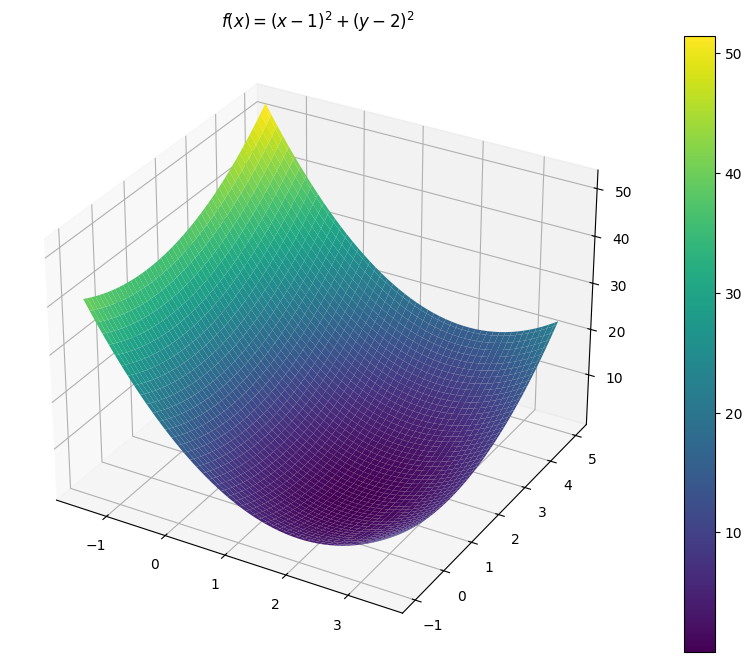

iterations= 61
last guess: x=(2.000000,1.000005)
iterations= 20
last guess: x=(2.000001,1.000003)


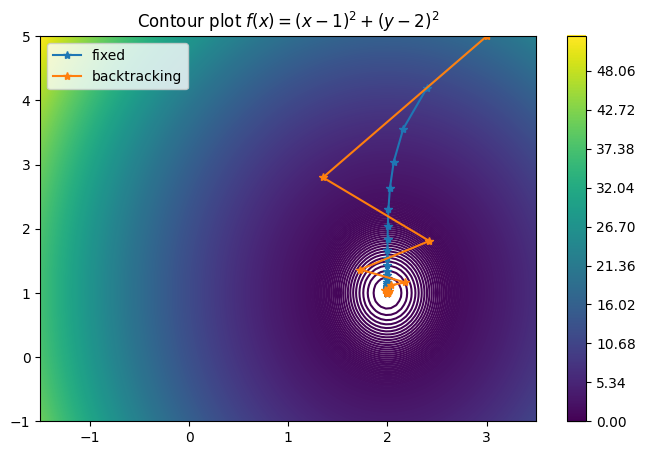

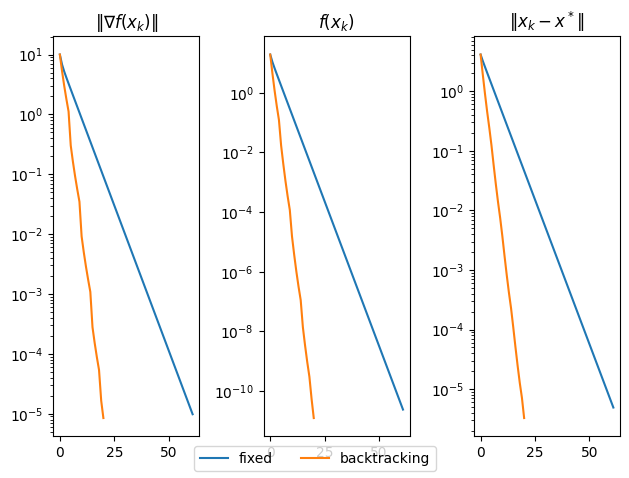

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(vec):
    x, y = vec
    fout = 3*(x-2)**2 + (y-1)**2
    return fout

def grad_f(vec):
    x, y = vec
    dfdx = 6*(x-2)
    dfdy = 2*(y-1)
    return np.array([dfdx,dfdy])

x = np.linspace(-1.5, 3.5, 100)
y = np.linspace(-1, 5, 100)
X, Y = np.meshgrid(x, y)
vec = np.array([X,Y])
Z=f(vec)
fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection='3d')
ax.set_title('$f(x)=(x-1)^2 + (y-2)^2$')
s = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(s)
plt.show()

fig = plt.figure(figsize=(8, 5))
contours = plt.contour(X, Y, Z, levels=1000)
plt.title('Contour plot $f(x)=(x-1)^2 + (y-2)^2$')
fig.colorbar(contours)

step = 0.1
maxitS=1000
tol=1.e-5
x0 = np.array([3,5])
xTrue = np.array([2,1])
(x_last,norm_grad_listf, function_eval_listf, error_listf, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=True)
plt.plot(xlist[0,:], xlist[1,:],'*-')
(x_last,norm_grad_list, function_eval_list, error_list, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=False)
plt.plot(xlist[0,:], xlist[1,:],'*-')
plt.legend(['fixed', 'backtracking'])
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.semilogy(norm_grad_listf)
ax1.semilogy(norm_grad_list)
ax1.set_title('$\|\\nabla f(x_k)\|$')
ax2.semilogy(function_eval_listf)
ax2.semilogy(function_eval_list)
ax2.set_title('$f(x_k)$')
ax3.semilogy(error_listf)
ax3.semilogy(error_list)
ax3.set_title('$\|x_k-x^*\|$')
fig.legend(['fixed', 'backtracking'], loc='lower center', ncol=4)
fig.tight_layout()
plt.show()

### Domanda 12: metodo del gradiente
In relazione alla richiesta sopra, si consideri la funzione di Rosenbrock:
$$ f(x, y) = 100(y − x^2)^2 + (1 − x)^2 $$
(che ha un minimo globale in (1, 1)).

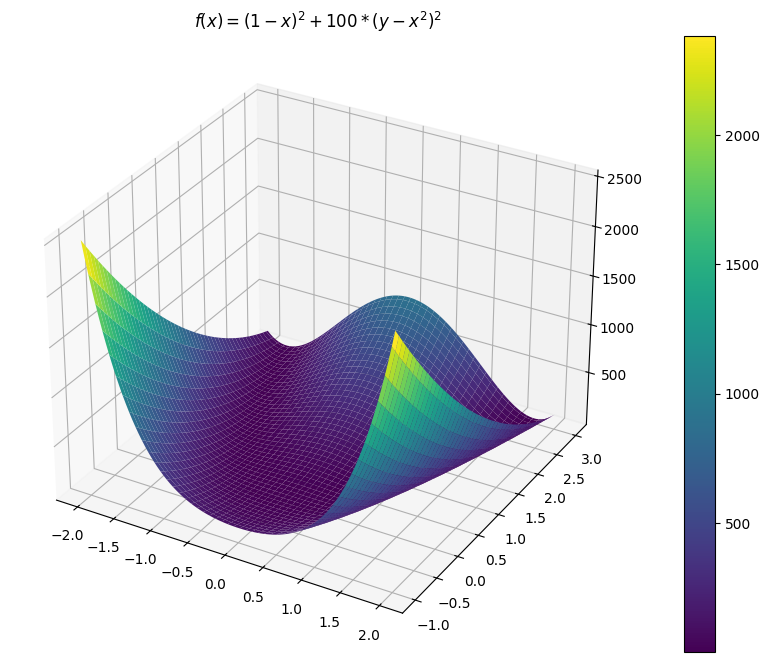

iterations= 1000
last guess: x=(0.759292,0.575417)
iterations= 1000
last guess: x=(0.992916,0.985849)


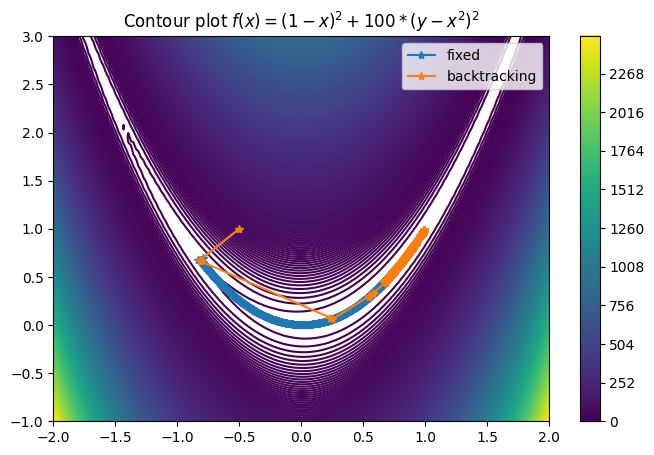

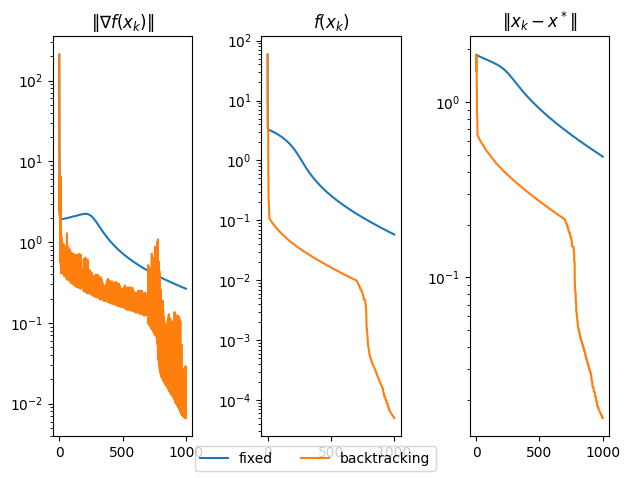

In [16]:
def f(vec):
    x, y = vec
    fout = 100*(y-x**2)**2 + (1-x)**2
    return fout

def grad_f(vec):
    x, y = vec
    dfdx = 2*(200*x**3-200*x*y+x-1)
    dfdy = 200*(y-x**2)
    return np.array([dfdx,dfdy])
    
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
vec = np.array([X,Y])
Z=f(vec)

fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection='3d')
ax.set_title('$f(x)=(1-x)^2+100*(y-x^2)^2$')
s = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(s)
plt.show()

fig = plt.figure(figsize=(8, 5))
contours = plt.contour(X, Y, Z, levels=1000)
plt.title('Contour plot $f(x)=(1-x)^2+100*(y-x^2)^2$')
fig.colorbar(contours)

step = 0.002
maxitS=1000
tol=1.e-5
x0 = np.array([-0.5,1])
xTrue = np.array([1,1])
(x_last,norm_grad_listf, function_eval_listf, error_listf, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=True)
plt.plot(xlist[0,:], xlist[1,:],'*-')
(x_last,norm_grad_list, function_eval_list, error_list, xlist, k)= minimize(f,grad_f,x0,step,maxitS,tol,xTrue,fixed=False)
plt.plot(xlist[0,:], xlist[1,:],'*-')
plt.legend(['fixed', 'backtracking'])
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.semilogy(norm_grad_listf)
ax1.semilogy(norm_grad_list)
ax1.set_title('$\|\\nabla f(x_k)\|$')
ax2.semilogy(function_eval_listf)
ax2.semilogy(function_eval_list)
ax2.set_title('$f(x_k)$')
ax3.semilogy(error_listf)
ax3.semilogy(error_list)
ax3.set_title('$\|x_k-x^*\|$')
fig.legend(['fixed', 'backtracking'], loc='lower center', ncol=4)
fig.tight_layout()
plt.show()

## Domanda 13: deblur
Discutere la ricostruzione di un’immagine corrotta da blur e rumore, mostrando la soluzione naive, ottenuta risolvendo il problema dei minimi quadrati e la soluzione ottenuta con il metodo di regolarizzazione di Tikhonov. 
Mostrare inoltre le immagini ricostruite e i grafici dei parametri PSNR e MSE al variare del numero di iterazioni. 
Infine discutere i risultati al variare del parametro di regolarizzazione $\lambda$.

## Domanda 14: super resolution
Discutere la ricostruzione di un’immagine corrotta da blur, downsampling e rumore, mostrando la soluzione naive, ottenuta risolvendo il problema dei minimi quadrati e la soluzione ottenuta con il metodo di regolarizzazione di Tikhonov. 
Mostrare inoltre le immagini ricostruite e i grafici dei parametri PSNR e MSE al variare del numero di iterazioni. 
Infine discutere i risultati al variare del parametro di regolarizzazione $\lambda$.